## Supervised Learning: Regression for Disease Progression (Diabetes)

##### (This notebook file is the modified version of PyCon13 scikit-learn tutorial designed by Jake VanderPlas) jakevdp@cs.washington.edu

By the end of this section you will

- Know how to instantiate a scikit-learn regression model
- Know how to train a regressor by calling the `fit(...)` method
- Know how to predict new labels by calling the `predict(...)` method

Here we'll do a short example of a regression problem: learning a continuous value
from a set of features.

We'll use the Diabetes data set, available in scikit-learn.  This
records measurements of 10 attributes (age, sex, body mass index, average blood pressure, and six blood serum measurements) obtained for n = 442 patients.  The question is: can we predict the disease progression (response of interest, a quantitative measure of disease progression one year after baseline)?

First we'll load the dataset:

In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
print data.keys()
var_names = ['age', 'sex', 'bmi', 'avg blood pres.', 'serum 1', 'serum 2', 'serum 3', 'serum 4', 'serum 5', 'serum 6']

['data', 'target']


We can see that there are just over 440 data points:

In [2]:
print data.data.shape
print data.target.shape

(442, 10)
(442,)


It often helps to quickly visualize pieces of the data using histograms, scatter plots,
or other plot types.  Here we'll load pylab and show a histogram of the target values:
the response of interest.

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


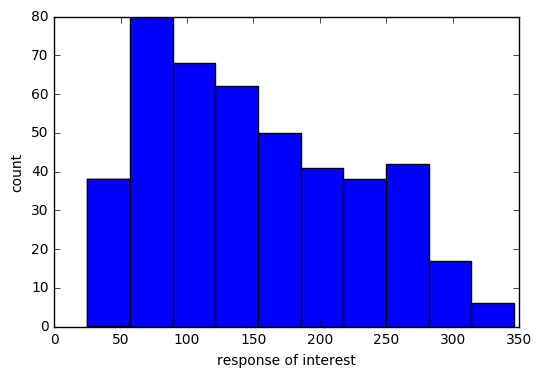

In [4]:
plt.hist(data.target)
plt.xlabel('response of interest')
plt.ylabel('count')
plt.show()

**Quick Exercise:** Try some scatter plots of the features versus the target.

Are there any features that seem to have a strong correlation with the
target value?  Any that don't?

Remember, you can get at the data columns using:

    column_i = data.data[:, i]

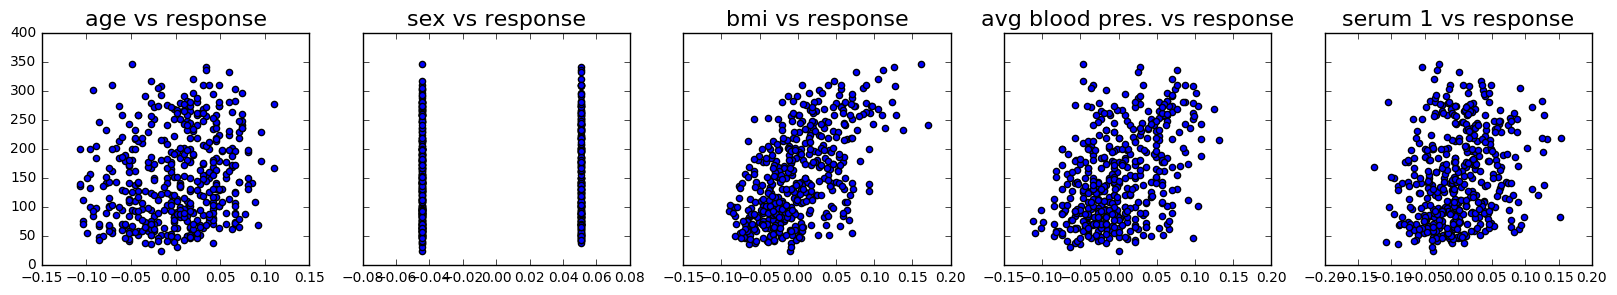

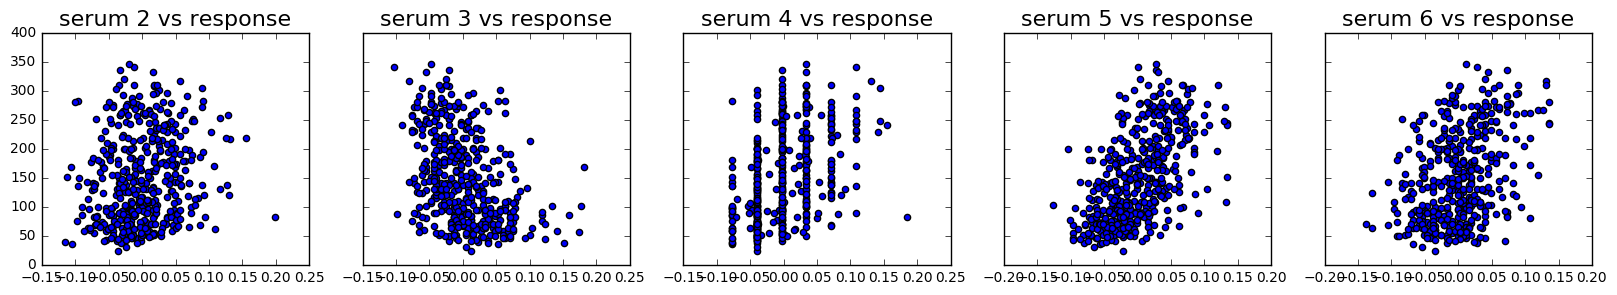

In [5]:
n_chns = 5
fig, axs = plt.subplots(1, n_chns, sharey=True, figsize=(20,3))
for ii in range(0,n_chns):
    index = ii;
    #index = ii + 5;
    axs[ii].scatter (data.data[:,index],data.target)
    axs[ii].set_title('{0} vs response'.format(var_names[index]),fontsize=16)
plt.show()

n_chns = 5
fig, axs = plt.subplots(1, n_chns, sharey=True, figsize=(20,3))
for ii in range(0,n_chns):
    index = ii + 5;
    axs[ii].scatter (data.data[:,index],data.target)
    axs[ii].set_title('{0} vs response'.format(var_names[index]),fontsize=16)
plt.show()

This is a manual version of a technique called **feature selection**.

Sometimes, in Machine Learning it is useful to use 
feature selection to decide which features are most useful for a
particular problem.  Automated methods exist which quantify this sort
of exercise of choosing the most informative features.  We won't cover
feature selection in this tutorial, but you can read about it elsewhere.

## Predicting Disease Progression: a Simple Linear Regression

Now we'll use ``scikit-learn`` to perform a simple linear regression
on the diabetes data.  There are many possibilities of regressors to
use. A particularly simple one is ``LinearRegression``: this is
basically a wrapper around an ordinary least squares calculation.

We'll set it up like this:

In [6]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

clf.fit(data.data, data.target)

(442, 10)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
predicted = clf.predict(data.data)

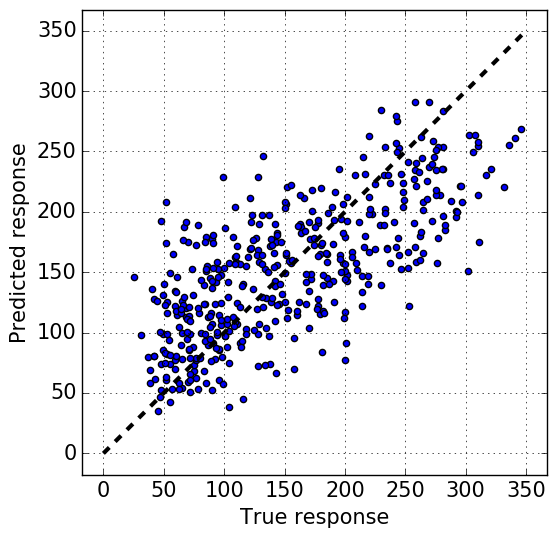

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(data.target, predicted)
plt.plot([0, 350], [0, 350], '--k', linewidth=3)
plt.axis('tight')
plt.xlabel('True response',fontsize=15)
plt.ylabel('Predicted response', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid('on')
plt.show()

In [10]:
# The coefficients
print('Attribute information and Model coefficients: \n')
for ii in range(0,len(clf.coef_)):
    print ('{0}: {1:.3f} \n'.format(var_names[ii],clf.coef_[ii]))

# The mean square error
print("Residual sum of squares: %.2f" % np.mean((predicted - data.target) ** 2))
print("Residual mean deviation: %.2f (K USD)" % np.sqrt(np.mean((predicted - data.target) ** 2)))
print('\n\n')

Attribute information and Model coefficients: 

age: -10.012 

sex: -239.819 

bmi: 519.840 

avg blood pres.: 324.390 

serum 1: -792.184 

serum 2: 476.746 

serum 3: 101.045 

serum 4: 177.064 

serum 5: 751.279 

serum 6: 67.625 

Residual sum of squares: 2859.69
Residual mean deviation: 53.48 (K USD)





The prediction at least correlates with the true response, though there
are clearly some biases.  We could imagine evaluating the performance
of the regressor by, say, computing the RMS residuals between the
true and predicted price.

## Alternative: Decision Tree Regression

There are many other types of regressors available in scikit-learn:
we'll try one more here.

**Use the DecisionTreeRegressor class to fit the diabetes data**.

You can copy and paste some of the above code, replacing `LinearRegression`
with `DecisionTreeRegressor`.

In [11]:
from sklearn.tree import DecisionTreeRegressor
# Instantiate the model, fit the results, and scatter in vs. out

clf = DecisionTreeRegressor()
clf.fit(data.data, data.target)

predicted = clf.predict(data.data)

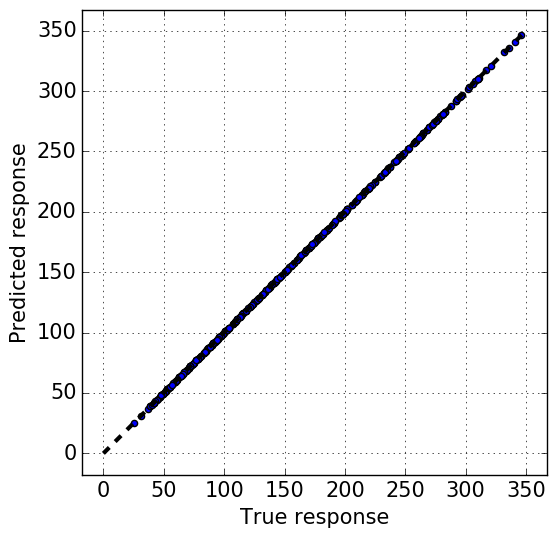

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(data.target, predicted)
plt.plot([0, 350], [0, 350], '--k', linewidth=3)
plt.axis('tight')
plt.xlabel('True response',fontsize=15)
plt.ylabel('Predicted response', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid('on')
plt.show()

Do you see anything surprising in the results?

The Decision Tree classifier is an example of an *instance-based* algorithm.
Rather than try to determine a model that best fits the data, an instance-based
algorithm in some way matches unknown data to the known catalog of training points.

How does this fact explain the results you saw here?

## Regression Playground

Let us know setup an experiment that allows us to compare different regression methods. To this end, we split the data into training and testing.

['data', 'target']
(342, 92378)
(100, 92378)
Residual sum of squares : 0.00 (training)
Residual sum of squares : 5738.25 (testing)
Score: 1.00 (training)
Score: -0.21 (testing)


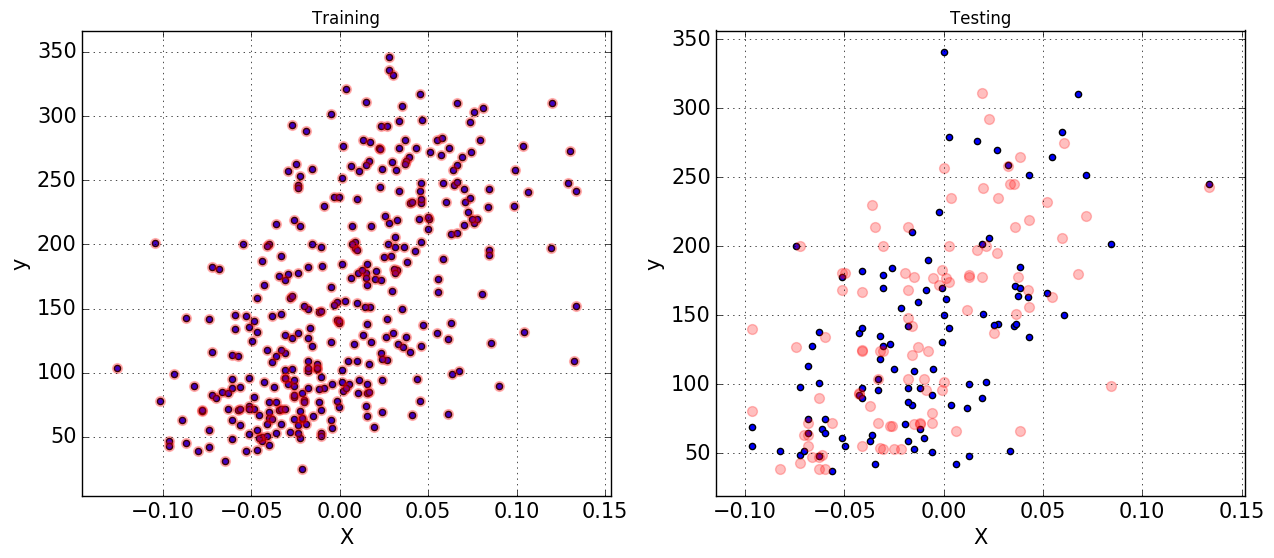

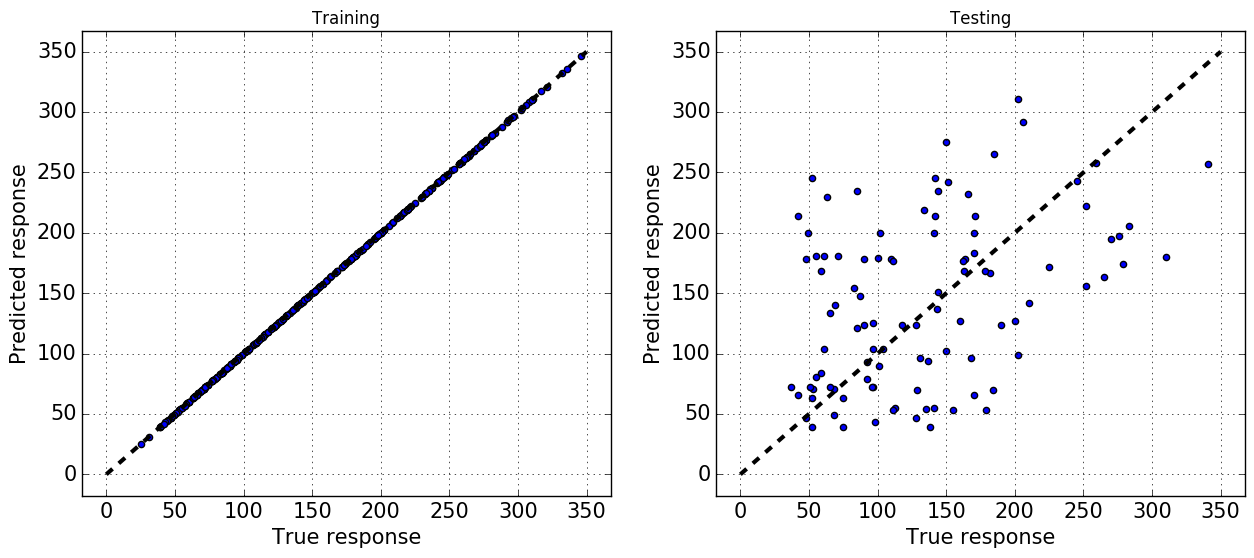

In [43]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
print data.keys()
var_names = ['age', 'sex', 'bmi', 'avg blood pres.', 'serum 1', 'serum 2', 'serum 3', 'serum 4', 'serum 5', 'serum 6']

import numpy as np
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#import sklearn
#print sklearn.__version__
from sklearn.preprocessing import PolynomialFeatures

X = data.data
X_train = X[100:,:]
X_test = X[0:100,:]

#Split into training and test data
y_train = data.target[100:]
y_test = data.target[0:100]

# Select plotted feature
#plot_feature = 2 #bmi 
#plot_feature = 3 #blood pressure 
#plot_feature = 6 #serum 3
plot_feature = 8  #serum 5

# Select features
#X_train2 = X_train # all features
#X_test2 = X_test # all features
X_train2 = X_train[:,1:] # remove first feature
X_test2 = X_test[:,1:] # remove first feature
#X_train2 = X_train[:,plot_feature].reshape(-1,1) # single feature
#X_test2 = X_test[:,plot_feature].reshape(-1,1) # single feature

#Add polynomial features
poly = PolynomialFeatures(degree=10)
X_train2 = poly.fit_transform(X_train2)
X_test2 = poly.fit_transform(X_test2)

# Create regression object
#regr = linear_model.LinearRegression()
regr = DecisionTreeRegressor()
#regr = RandomForestRegressor()


# Train the model using the training sets
regr.fit(X_train2, y_train)

print X_train2.shape
print X_test2.shape


# The mean square error
print("Residual sum of squares : %.2f (training)"
      % np.mean((regr.predict(X_train2) - y_train) ** 2))
print("Residual sum of squares : %.2f (testing)"
      % np.mean((regr.predict(X_test2) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Score: %.2f (training)' % regr.score(X_train2, y_train))
print('Score: %.2f (testing)' % regr.score(X_test2, y_test))

# Plot outputs
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:,plot_feature], y_train)
plt.scatter(X_train[:,plot_feature], regr.predict(X_train2), s=50, color='red', alpha=0.25)
plt.grid('on')
plt.axis('tight')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('X',fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('Training')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:,plot_feature], y_test)
plt.scatter(X_test[:,plot_feature], regr.predict(X_test2), s=50, color='red', alpha=0.25)
plt.grid('on')
plt.axis('tight')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('X',fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('Testing')

plt.show()


plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, regr.predict(X_train2))
plt.plot([0, 350], [0, 350], '--k', linewidth=3)
plt.axis('tight')
plt.xlabel('True response',fontsize=15)
plt.ylabel('Predicted response', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid('on')
plt.title('Training')

plt.subplot(1, 2, 2)
plt.scatter(y_test, regr.predict(X_test2))
plt.plot([0, 350], [0, 350], '--k', linewidth=3)
plt.axis('tight')
plt.xlabel('True response',fontsize=15)
plt.ylabel('Predicted response', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid('on')
plt.title('Testing')

plt.show()